In [56]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [57]:
# Read in data sets to Pandas
books = pd.read_csv('books.csv', sep=',', error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('ratings.csv', sep=',', error_bad_lines=False)

In [58]:
# Identify books.csv has been read in correctly.
print(books.head())
print(ratings.head())

   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5               4671          4671   245494         1356  743273567   

         isbn13                       authors  original_publication_year  \
0  9.780439e+12               Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPrÃ©                     1997.0   
2  9.780316e+12               Stephenie Meyer                     2005.0   
3  9.780061e+12                    Harper Lee                     1960.0   
4  9.780743e+12           F. Scott Fitzgerald                     1925.0   

                             original_title  \
0              

In [59]:
ratings_pivot = ratings.pivot(index="user_id", columns="book_id", values="rating")
user_id = ratings_pivot.index
book_id = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(53424, 10000)


book_id  1      2      3      4      5      6      7      8      9      10     \
user_id                                                                         
1          NaN    NaN    NaN    5.0    NaN    NaN    NaN    NaN    NaN    4.0   
2          NaN    5.0    NaN    NaN    5.0    NaN    NaN    4.0    NaN    5.0   
3          NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    5.0    NaN    4.0    4.0    NaN    4.0    4.0    NaN    5.0   
5          NaN    NaN    NaN    NaN    NaN    4.0    NaN    NaN    NaN    NaN   

book_id  ...    9991   9992   9993   9994   9995   9996   9997   9998   9999   \
user_id  ...                                                                    
1        ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

book_id  10000  
user_id         
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  

[5 rows x 10000 columns]

In [60]:
ratings_pivot.fillna(0)

book_id  1      2      3      4      5      6      7      8      9      10     \
user_id                                                                         
1          0.0    0.0    0.0    5.0    0.0    0.0    0.0    0.0    0.0    4.0   
2          0.0    5.0    0.0    0.0    5.0    0.0    0.0    4.0    0.0    5.0   
3          0.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    5.0    0.0    4.0    4.0    0.0    4.0    4.0    0.0    5.0   
5          0.0    0.0    0.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0   
6          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7          0.0    0.0    0.0    0.0    3.0    0.0    0.0    2.0    0.0    0.0   
8          0.0    0.0    0.0    3.0    3.0    0.0    0.0    0.0    0.0    1.0   
9          4.0    4.0    4.0    0.0    5.0    0.0    0.0    0.0    1.0    5.0   
10         0.0    0.0    0.0    5.0    5.0    0.0    0.0    0.0    0.0    5.0   
11         0.0    0.0    0.0    3.0    0.0    0.0    0.0    5.0    0.0    0.0   
12         0.0    5.0    2.0    4.0    2.0    0.0    0.0    4.0    4.0    0.0   
13         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14         4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15         0.0    4.0    5.0    3.0    4.0    0.0    0.0    5.0    3.0    5.0   
16         0.0    0.0    0.0    0.0    0.0    0.0    0.0    4.0    0.0    3.0   
17         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18         0.0    0.0    2.0    4.0    4.0    0.0    5.0    4.0    2.0    0.0   
19         0.0    3.0    0.0    4.0    3.0    0.0    3.0    3.0    0.0    4.0   
20         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21         0.0    4.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0    4.0   
22         3.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    2.0    0.0   
23         0.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0   
24         0.0    3.0    0.0    4.0    4.0    0.0    0.0    4.0    4.0    4.0   
25         0.0    0.0    0.0    4.0    0.0    0.0    0.0    5.0    0.0    0.0   
26         0.0    0.0    0.0    0.0    0.0    0.0    0.0    4.0    0.0    0.0   
27         4.0    0.0    0.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0   
28         5.0    0.0    0.0    5.0    3.0    0.0    0.0    4.0    3.0    0.0   
29         0.0    5.0    0.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0   
30         4.0    4.0    0.0    0.0    3.0    0.0    0.0    4.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
53395      4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53396      0.0    0.0    0.0    0.0    0.0    0.0    5.0    0.0    0.0    0.0   
53397      5.0    0.0    4.0    4.0    3.0    0.0    4.0    4.0    0.0    5.0   
53398      0.0    4.0    2.0    0.0    0.0    0.0    5.0    0.0    2.0    0.0   
53399      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    5.0    0.0   
53400      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53401      5.0    5.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53402      3.0    4.0    3.0    5.0    0.0    4.0    5.0    0.0    0.0    0.0   
53403      0.0    4.0    0.0    0.0    0.0    0.0    3.0    0.0    0.0    3.0   
53404      5.0    0.0    5.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53405      0.0    0.0    0.0    0.0    5.0    0.0    0.0    3.0    4.0    0.0   
53406      3.0    5.0    1.0    5.0    1.0    0.0    5.0    0.0    3.0    4.0   
53407      4.0    4.0    4.0    0.0    0.0    5.0    0.0    0.0    5.0    0.0   
53408      5.0    0.0    4.0    4.0    4.0    4.0    0.0    0.0    0.0    0.0   
53409      4.0    4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53410      0.0    0.0    0.0    0.0    0.0    0.0    5.0    0.0    0.0    0.0   
53411      0.0    0.0    0.0   

In [61]:
Y=ratings_pivot.values
Y=Y.T

nan_locs = np.isnan(Y)
Y[nan_locs] = 0

In [62]:
def createR(Y):
    R = Y!=0
    R = np.asarray(R, dtype = 'int')
    return R

In [63]:
print(type(Y))
num_books = 500
num_users = 1000

Y_subset = Y[0:num_books, 0:num_users]

R = createR(Y_subset)
#Y_subset = Y_subset - 2.5*R
print(R)
print(Y_subset)

<class 'numpy.ndarray'>
[[0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 4. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
def normalise_ratings(Y, R):
    num_books, num_users = Y.shape
    Y_mean = np.zeros(shape=(num_books, 1))
    Y_norm = np.zeros(shape=(Y.shape))
    
    for i in range(num_books):
        idx = np.where(R[i, :] == 1)
        Y_mean[i] = Y[i, idx].mean()
        Y_norm[i, idx] = Y[i, idx] - Y_mean[i]
        
    return Y_norm, Y_mean

In [65]:
Y_norm, Y_mean = normalise_ratings(Y_subset, R)
print(Y_norm)

[[ 0.          0.          0.         ... -0.20057307  0.
   0.        ]
 [ 0.          0.97457627  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.03636364  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [66]:

#print(Y_norm)
#Y_norm = scipy.sparse.csc_matrix(Y_norm)
#X_svd, latent_factors, Theta_svd = scipy.sparse.linalg.svds(Y_norm, k = 50)
#preds = np.dot(X_svd, Theta_svd) + Y_mean
#print((preds), (Y_norm.toarray()+ Y_mean))

In [67]:
num_features = 50
X = np.random.rand(num_books,num_features)
Theta = np.random.rand(num_users, num_features)
#print(X)
#print(Theta)

In [68]:
params = np.append(X.flatten(), Theta.flatten())

In [70]:
def param_initialize(num_books, num_features, num_users):
    epsilon = 0.1
    X = np.random.rand(num_books,num_features)*2*epsilon - epsilon
    Theta = np.random.rand(num_users, num_features)*2*epsilon - epsilon
    params = np.append(X.flatten(), Theta.flatten())
    return params

def param_initialize_ALS(num_books, num_features, num_users, Y_mean):
    epsilon = 0.1
    X = np.random.rand(num_books,num_features)*2*epsilon - epsilon
    print(X[:,0].shape)
    X[:,0]=Y_mean.T
    Theta = np.random.rand(num_users, num_features)*2*epsilon - epsilon
    params = np.append(X.flatten(), Theta.flatten())
    return params

def param_reshape(params, num_books, num_features, num_users):
    X = params[:num_books*num_features].reshape(num_books, num_features)
    Theta = params[num_books*num_features:].reshape(num_users, num_features)
    return X, Theta

In [71]:
def cost_function(params, Y, R, num_users, num_features, num_books, lamda):
    # Reshape params back to X and Theta
    X, Theta = param_reshape(params, num_books, num_features, num_users)
    #X = params[:num_books*num_features].reshape(num_books, num_features)
    #Theta = params[num_books*num_features:].reshape(num_users, num_features)
    #print(X.shape, Theta.shape)
    
    # Initialise cost and gradients
    J = 0
    n_known_ratings = (R.sum()).sum()
    
    J = (1/2)*((((np.matmul(X, Theta.T)*R)-Y)**2).sum()).sum()
    #print(str(J) + 'without reg')
    
    J_reg = (lamda/2)*((Theta**2).sum()).sum() + (lamda/2)*((X**2).sum()).sum()
    
    J = J + J_reg
    #print(str(J) + 'with reg')
    
    # Flatten X and Theta to 1D vector
    #params = X.flatten()
    #params = np.append(params, Theta.flatten())
    
    return J

In [72]:
def grad_function(params, Y, R, num_users, num_features, num_books, lamda):
    # Reshape params back to X and Theta
    X, Theta = param_reshape(params, num_books, num_features, num_users)
    #X = params[:num_books*num_features].reshape(num_books, num_features)
    #Theta = params[num_books*num_features:].reshape(num_users, num_features)
    #print(X.shape, Theta.shape)
    
    # Initialise cost and gradients
    X_grad = np.zeros(shape=X.shape)
    Theta_grad = np.zeros(shape=Theta.shape)
    
    X_grad = np.matmul(((np.matmul(X, Theta.T)*R)-Y), Theta) + (lamda*X)
    Theta_grad = np.matmul(((np.matmul(X, Theta.T)*R)-Y).T, X) + (lamda*Theta)

    # Flatten X_grad and Theta_grad and combine to a 1D vector
    grad = np.append(X_grad.flatten(), Theta_grad.flatten())
    
    return grad

In [73]:
J = cost_function(params, Y_subset, R, num_users, num_features, num_books, 1)
grad = grad_function(params, Y_subset, R, num_users, num_features, num_books, 1)

In [74]:
args = (Y_norm, R, num_users, num_features, num_books, 0)
def SGD(params, *args, iters, alpha):
    # Initialise params
    params = param_initialize(num_books, num_features, num_users)
    #X = np.random.rand(num_books,num_features)
    #Theta = np.random.rand(num_users, num_features)
    #params = np.append(X.flatten(), Theta.flatten())
    
    J_hist=np.zeros(shape=(1,1))
    
    # Start iterations
    for i in range(iters):
        # Calculate costs
        J = cost_function(params, *args)
        J_hist = np.append(J_hist, J)
        
        # Calculate gradients
        grad = grad_function(params, *args)
        
        # Apply update rule
        X_params = params[:num_books*num_features] + alpha*grad[0:num_books*num_features]
        Theta_params = params[num_books*num_features:] + alpha*grad[num_books*num_features:]
        
        # Flatten parameters
        params = np.append(X_params.flatten(), Theta_params.flatten())
        if i%100 == 0:
            print(i, J)
        if np.abs(J-J_hist[-2]) <= 1e-2:
            print('Convergence Criteria of J <= 1e-2 met. Exiting.')
            break
            
    print(str(i) + ' Iterations completed.')
    return params, J_hist 

In [75]:
#args = (Y_norm, R, num_users, num_features, num_books, 0)
def miniBatchSGD(params, *args, iters, alpha):
    # Initialise params
    params = param_initialize(num_books, num_features, num_users)
    R_temp=R.copy()
    #X = np.random.rand(num_books,num_features)
    #Theta = np.random.rand(num_users, num_features)
    #params = np.append(X.flatten(), Theta.flatten())
    J_hist=np.zeros(shape=(1,1))
    
    # Start iterations
    for i in range(iters):
        
        rows_filled, columns_filled = np.where(R_temp==1)
        
        if len(rows_filled)==0:
            R_temp=R.copy()
            rows_filled, columns_filled = np.where(R_temp==1)
        
        random_selection = np.random.randint(0, high=len(rows_filled), size=100)
        R_temp[rows_filled[random_selection], columns_filled[random_selection]] = 0
        
        # Calculate costs
        J = cost_function(params, *args)
        J_hist = np.append(J_hist, J)
        
        X, Theta = param_reshape(params, num_books, num_features, num_users)
        X_batch = X[rows_filled[random_selection], :]
        Theta_batch = Theta[columns_filled[random_selection], :]
        Y_batch = Y_norm[rows_filled[random_selection], columns_filled[random_selection]]
        R_batch = R[rows_filled[random_selection], columns_filled[random_selection]]
        params_batch = np.append(X_batch.flatten(), Theta_batch.flatten())
        
        # Calculate gradients
        args_batch = (Y_batch, R_batch, Theta_batch.shape[0], num_features, X_batch.shape[0], 0)
        grad = grad_function(params_batch, *args_batch)
        
        # Apply update rule to batch
        X_params = params_batch[0:X_batch.shape[0]*num_features] + alpha*grad[0:X_batch.shape[0]*num_features]
        Theta_params = params_batch[X_batch.shape[0]*num_features:] + alpha*grad[X_batch.shape[0]*num_features:]
        
        # Reshape parameters and update larger matrix
        params_temp = np.append(X_params, Theta_params)
        X_temp, Theta_temp = param_reshape(params_temp, X_batch.shape[0], num_features, Theta_batch.shape[0])
        
        X[rows_filled[random_selection], :] = X_temp
        Theta[columns_filled[random_selection], :] = Theta_temp
        params =np.append(X.flatten(), Theta.flatten())
        if i%100 == 0:
            print(i, J)
        if np.abs(J-J_hist[-2]) <= 1e-2:
            print('Convergence Criteria of J <= 1e-2 met. Exiting.')
            break
            
    print(str(i) + ' Iterations completed.')
    return params, J_hist 

In [76]:
args = (Y_norm, R, num_users, num_features, num_books, 1)
def ALS(params, *args, iters, alpha, Y_mean):

    # Initialise params
    params = param_initialize_ALS(num_books, num_features, num_users, Y_mean)
    #params = param_initialize(num_books, num_features, num_users)
    inner_iters = 1000
    J_hist=np.zeros(shape=(1,1))
    
    # Calculate costs
    J = cost_function(params, *args)
    J_hist = np.append(J_hist, J)
    
    # Set fix X flag
    fix_x=1
    for j in range(iters):
        # Start iterations
        for i in range(inner_iters):
           

            # Calculate gradients
            grad = grad_function(params, *args)

            # Apply update rule
            if fix_x==0:
                X_params = params[:num_books*num_features] + alpha*grad[0:num_books*num_features]
                Theta_params = params[num_books*num_features:]
            else:
                X_params = params[:num_books*num_features]
                Theta_params = params[num_books*num_features:] + alpha*grad[num_books*num_features:]

            # Flatten parameters
            params = np.append(X_params.flatten(), Theta_params.flatten())
            fix_x = not fix_x
            
             # Calculate costs
            J = cost_function(params, *args)
            J_hist = np.append(J_hist, J)
            
            if i%100 == 0:
                print(str(i) + ' Inner loop iterations', J)
            if np.abs(J-J_hist[-2]) <= 1e-3:
                print('Convergence Criteria of J <= 1e-3 met. Exiting innerloop.')
                break

        print(str(i) + ' Inner Iterations completed.')
    
        if j%1 == 0:
            print(str(j) + ' Outer loop iterations', J)
        if np.abs(J-J_hist[-2]) <= 1e-3:
            print('Convergence Criteria of J <= 1e-3 met. Exiting outerloop.')
            break

    print(str(j) + ' Outer Iterations completed.')
    return params, J_hist 

In [77]:
#args = (Y_norm, R, num_users, num_features, num_books, 10)
#params, J_hist = miniBatchSGD(params, *args, iters=5000, alpha=-0.001)

In [78]:
#params, J_hist = SGD(params, *args, iters=5000, alpha=-0.0003)
#res = optimize.minimize(cost_function, params, jac=grad_function, args=args, method='BFGS', options={'gtol': 1e-14, 'disp': True})

In [79]:
args = (Y_norm, R, num_users, num_features, num_books, 1)
params, J_hist = ALS(params, *args, iters=5, alpha=-0.001, Y_mean=Y_mean)

(500,)
0 Inner loop iterations 21213.718960569775
100 Inner loop iterations 19624.406220307545
200 Inner loop iterations 17714.191861950327
300 Inner loop iterations 14241.204245707404
400 Inner loop iterations 11048.726859805804
500 Inner loop iterations 8896.091427965075
600 Inner loop iterations 7515.424921382331
700 Inner loop iterations 6600.742447005446
800 Inner loop iterations 5965.780665331225
900 Inner loop iterations 5504.047238652603
999 Inner Iterations completed.
0 Outer loop iterations 5155.874426848428
0 Inner loop iterations 5153.805198667873
100 Inner loop iterations 4878.29288388932
200 Inner loop iterations 4655.0266630787955
300 Inner loop iterations 4469.844703344588
400 Inner loop iterations 4313.508247923666
500 Inner loop iterations 4179.750640189962
600 Inner loop iterations 4064.1527136919676
700 Inner loop iterations 3963.4847020052443
800 Inner loop iterations 3875.3105125690536
900 Inner loop iterations 3797.7414659737274
999 Inner Iterations completed.
1 

In [80]:
X_trained, Theta_trained = param_reshape(params, num_books, num_features, num_users)

In [81]:
pred = np.matmul(X_trained, Theta_trained.T)
adjusted_predictions = (pred + Y_mean)
print(np.round(adjusted_predictions))
Y_subset = Y_norm + Y_mean*R
print(Y_subset)

[[3. 5. 4. ... 4. 5. 4.]
 [4. 5. 3. ... 4. 4. 3.]
 [3. 4. 3. ... 4. 4. 2.]
 ...
 [4. 4. 4. ... 4. 5. 3.]
 [3. 3. 3. ... 3. 3. 2.]
 [3. 4. 2. ... 3. 3. 3.]]
[[0. 0. 0. ... 4. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[    0.         25011.53355152 21213.71896057 ...  3172.8134188
  3172.77138063  3172.73202992]


C:\Users\as166\Anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


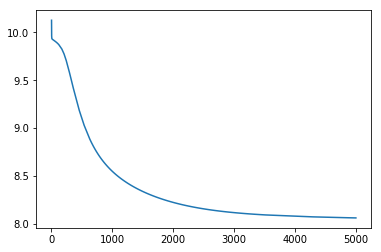

In [82]:
plt.figure()
print(J_hist)
plt.plot(range(len(J_hist)), np.log(J_hist))

In [83]:
# Predict user4's top 10 books
userid=871
predictions_for_user = adjusted_predictions[:,userid-1]
# Add 1 to convert to bookids
sort_idx = np.argsort(predictions_for_user) + 1
print(sort_idx[-10:])

[143  17 113  47 313 436 121  59 101 135]


In [84]:
books.loc[books['book_id'].isin(sort_idx[-20:])]

book_id  goodreads_book_id  best_book_id   work_id  books_count  \
16        17            6148028       6148028   6171458          201   
19        20            7260188       7260188   8812783          239   
32        33                930           929   1558965          220   
46        47              19063         19063    878368          251   
58        59              24178         24178    987048          180   
100      101               4137          4137   1030767           59   
112      113             168668        168668    814330          251   
120      121               7604          7604   1268631          370   
134      135              62291         62291   1164465          175   
142      143           18143977      18143977  25491300          139   
172      173             227463        227463     23596          283   
183      184              39988         39988   1015554          242   
214      215            9969571       9969571  14863741          112   
266      267           21853621      21853621  41125521           90   
312      313           13158800      13158800  18337340          113   
324      325               4473          4473   1734019          138   
382      383               1241          1241   3140930           69   
408      409               9375          9375   2129359           94   
435      436               9777          9777    810135          168   
466      467             297673        297673   3281466            9   

           isbn        isbn13                                     authors  \
16    439023491  9.780439e+12                             Suzanne Collins   
19    439023513  9.780439e+12                             Suzanne Collins   
32    739326228  9.780739e+12                               Arthur Golden   
46    375831002  9.780376e+12                                Markus Zusak   
58     64410935  9.780064e+12  E.B. White, Garth Williams, Rosemary Wells   
100   349113912  9.780349e+12                               David Sedaris   
112   684833395  9.780685e+12                               Joseph Heller   
120         NaN           NaN               Vladimir Nabokov, Craig Raine   
134  055357342X  9.780554e+12                          George R.R. Martin   
142  1476746583  9.781477e+12                               Anthony Doerr   
172   393312836  9.780393e+12                             Anthony Burgess   
183   141301066  9.780141e+12                   Roald Dahl, Quentin Blake   
214  030788743X  9.780308e+12                                Ernest Cline   
266   312577222  9.780313e+12                              Kristin Hannah   
312  1451681739  9.781452e+12                                M.L. Stedman   
324   552135399  9.780552e+12                                 John Irving   
382   307276902  9.780307e+12                                  James Frey   
408   375508414  9.780376e+12                                Fannie Flagg   
435   679457313  9.780679e+12                               Arundhati Roy   
466  1594489580  9.781594e+12                                 Junot DÃ­az   

     original_publication_year                                 original_title  \
16                      2009.0                                  Catching Fire   
19                      2010.0                                     Mockingjay   
32                      1997.0                            Memoirs of a Geisha   
46                      2005.0                                 The Book Thief   
58                      1952.0                                Charlotte's Web   
100                     2000.0                         Me Talk Pretty One Day   
112                     1961.0                                       Catch-22   
120                     1955.0                                         Lolita   
134                     2000.0                              A Storm of Swords   
142                     2014.0                                  

In [85]:
def getNewUserId():
    last_user_id = ratings['user_id'].max()
    new_user_id = last_user_id + 1
    return new_user_id
username_initial = ['testing1','testing2']
new_user_id1 = getNewUserId()
new_user_id2 = getNewUserId() + 1
user_id_initial = [new_user_id1, new_user_id2]
user_list = pd.DataFrame({'username': username_initial, 'user_id': user_id_initial})
user_list.head()

username  user_id
0  testing1    53425
1  testing2    53426

In [86]:
def findUsername(username):
    if user_list['username'].str.contains(username).any():
        current_user_id = user_list['user_id'].loc[user_list['username'].str.contains(username)].values
    else:
        current_user_id = getNewUserId()    
    return current_user_id

In [87]:
username = 'testing2'
current_user_id = findUsername(username)

In [88]:
print(current_user_id)
print(username)

[53426]
testing2


In [89]:
class current_user():
    def __init__(self, username):
        self.username = username
        self.user_id = findUsername(self.username)
        #self.ratings = getRatings(self.user_id)

    def getBookList(self, user_id):
        booklist = ratings['book_id'].loc[ratings['user_id']== user_id].values
        print(booklist)
        return booklist
    

In [90]:
ayuran = current_user(username)


In [91]:
user5_booklist = ayuran.getBookList(userid)
books.loc[books['book_id'].isin(user5_booklist)]

[3234 1236  484  196  951 1124  854  743 1153 3519  177   27   21    2
   24   23   18    8  401    5 1184 2304 3255 1056  205  696  357  265
  115  681 2556 2571 1489 1956 2324  388  136  130  213   55   13  780
 9566 7254 1606 1267 1627 1390 1232 1181  912 1151 1226 1067  207  996
  544   28 5973  125  154  248  353  804  855  773 2229 7074   29   78
 4695  400  117   72  387  934 1186  715 2052 2240   83   79  373 1639
 2215  999 1096    9  102 2620  793   58   50 1383  227  123  162  977
  238 8411 8937 2187 1518 4974  131 9158 2034 9663 3997 1280  341  531
 2403  512  122 7214 1552 4369  138 3595 3853 8598  576 6532 8956 5733
  180   25  474]


book_id  goodreads_book_id  best_book_id   work_id  books_count  \
1           2                  3             3   4640799          491   
4           5               4671          4671    245494         1356   
7           8               5107          5107   3036731          360   
8           9                960           960   3338963          311   
12         13               5470          5470    153313          995   
17         18                  5             5   2402163          376   
20         21                  2             2   2809203          307   
22         23              15881         15881   6231171          398   
23         24                  6             6   3046572          332   
24         25             136251        136251   2963218          263   
26         27                  1             1  41335427          275   
27         28               7624          7624   2766512          458   
28         29              18135         18135   3349450         1937   
49         50              30119         30119     30518           45   
54         55               5129          5129   3204877          515   
57         58               2956          2956   1835605         2277   
71         72              11588         11588    849585          289   
77         78               5139          5139     38765          129   
78         79               1381          1381   3356006         1703   
82         83               1953          1953   2956372          525   
101       102              19543         19543   3020535          110   
114       115               2187          2187   1352495          125   
116       117              18131         18131    948387          165   
121       122              37442         37442   1479280           80   
122       123               5358          5358     38270           11   
124       125               1420          1420   1885548         1929   
129       130               2165          2165     69741          666   
130       131               4395      18114322   2931549          381   
135       136             137791        137791   1010054           75   
137       138              12296         12296   4925227         1579   
...       ...                ...           ...       ...          ...   
2228     2229             227603        227603    892616           30   
2239     2240               5517          5517   3154525           56   
2303     2304              46165         46165   2520849          607   
2323     2324               8248          8248   2933942           68   
2402     2403              45195         45195   4574850          194   
2555     2556               8282          8282   3327855           70   
2570     2571              77770         77770      4132           65   
2619     2620               6667          6667    113746          102   
3233     3234               8252          8252   1366740           62   
3254     3255               4708          4708   2432116          522   
3518     3519              31196         31196   2095259          152   
3594     3595              23522         23522   2625557          111   
3852     3853             116020        116020  50513135          263   
3996     3997               6697          6697    851747           40   
4368     4369               3717      24820339    382865           47   
4694     4695              31862         31862   2342366           73   
4973     4974              87346         87346   1616484          240   
5732     5733             125553        125553    448935           65   
5972     5973               9914          9914   1308950           21   
6531     6532             125564        125564   3138654           69   
7073     7074              13020         13020   3335240          401   
7213     7214              31333         31333   2925978           36   
7253     7254              24816         24816   2369970        

In [92]:
books.loc[(~books['book_id'].isin(user5_booklist)) & books['book_id'].isin(sort_idx[-25:])]

book_id  goodreads_book_id  best_book_id   work_id  books_count  \
11        12           13335037      13335037  13155899          210   
16        17            6148028       6148028   6171458          201   
19        20            7260188       7260188   8812783          239   
32        33                930           929   1558965          220   
46        47              19063         19063    878368          251   
58        59              24178         24178    987048          180   
65        66              18405         18405   3358283          409   
100      101               4137          4137   1030767           59   
112      113             168668        168668    814330          251   
120      121               7604          7604   1268631          370   
134      135              62291         62291   1164465          175   
142      143           18143977      18143977  25491300          139   
172      173             227463        227463     23596          283   
183      184              39988         39988   1015554          242   
214      215            9969571       9969571  14863741          112   
266      267           21853621      21853621  41125521           90   
312      313           13158800      13158800  18337340          113   
324      325               4473          4473   1734019          138   
382      383               1241          1241   3140930           69   
397      398               1097          1097   2207547           61   
408      409               9375          9375   2129359           94   
435      436               9777          9777    810135          168   
466      467             297673        297673   3281466            9   

           isbn        isbn13                                     authors  \
11     62024035  9.780062e+12                               Veronica Roth   
16    439023491  9.780439e+12                             Suzanne Collins   
19    439023513  9.780439e+12                             Suzanne Collins   
32    739326228  9.780739e+12                               Arthur Golden   
46    375831002  9.780376e+12                                Markus Zusak   
58     64410935  9.780064e+12  E.B. White, Garth Williams, Rosemary Wells   
65    446675539  9.780447e+12                           Margaret Mitchell   
100   349113912  9.780349e+12                               David Sedaris   
112   684833395  9.780685e+12                               Joseph Heller   
120         NaN           NaN               Vladimir Nabokov, Craig Raine   
134  055357342X  9.780554e+12                          George R.R. Martin   
142  1476746583  9.781477e+12                               Anthony Doerr   
172   393312836  9.780393e+12                             Anthony Burgess   
183   141301066  9.780141e+12                   Roald Dahl, Quentin Blake   
214  030788743X  9.780308e+12                                Ernest Cline   
266   312577222  9.780313e+12                              Kristin Hannah   
312  1451681739  9.781452e+12                                M.L. Stedman   
324   552135399  9.780552e+12                                 John Irving   
382   307276902  9.780307e+12                                  James Frey   
397    60838582  9.780061e+12                              Eric Schlosser   
408   375508414  9.780376e+12                                Fannie Flagg   
435   679457313  9.780679e+12                               Arundhati Roy   
466  1594489580  9.781594e+12                                 Junot DÃ­az   

     original_publication_year  \
11                      2011.0   
16                      2009.0   
19                      2010.0   
32                      1997.0   
46                      2005.0   
58                      1952.0   
65                      1936.0   
100                     2000.0   
112                     1961.0   
120                     1955.0   
134                     2000.0   
142                